## Logistic Regression

We have to find if a passanger is survived or not. Survived is dependent variable here and all other are independent variable

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
titanic = pd.read_csv('titanic-training-data.csv')

In [7]:
titanic.head()

,PassengerId,Survived,Passenger class,Name,Sex,Age,Sibling Spouse,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.shape

(891, 12)

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Passenger class  891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   Sibling Spouse   891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.dtypes

PassengerId          int64
Survived             int64
Passenger class      int64
Name                object
Sex                 object
Age                float64
Sibling Spouse       int64
Parch                int64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

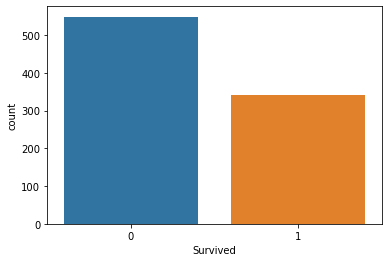

In [11]:
sns.countplot(x ='Survived', data = titanic)    #0 is not survived and 1 is survived

<AxesSubplot:xlabel='Sex', ylabel='count'>

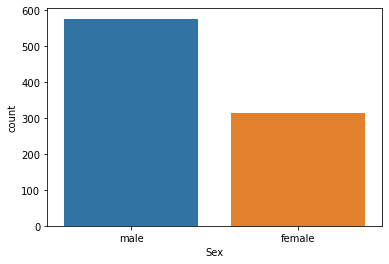

In [12]:
sns.countplot(x = 'Sex', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

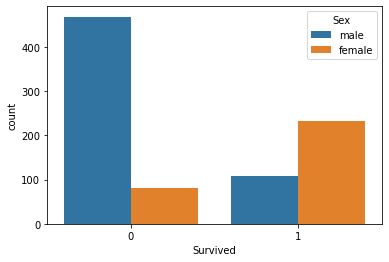

In [13]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic) 

# this shows even though total females were less than males, females survived more than males.

<AxesSubplot:xlabel='Survived', ylabel='count'>

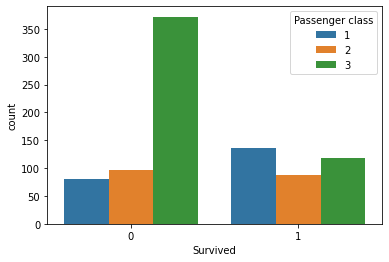

In [14]:
sns.countplot(x = 'Survived', hue = 'Passenger class', data = titanic)

#this shows most people were from 3rd class and most people died were from 3rd class. Less than half people survived in 3rd class
# Even though no. of 1st class passengers was less, most people survived were from 1st class.

<AxesSubplot:xlabel='Sibling Spouse', ylabel='count'>

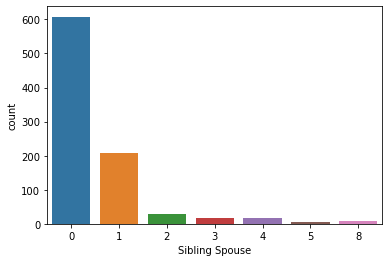

In [15]:
sns.countplot(x = 'Sibling Spouse', data = titanic)

#this shows most people travelled alone

### Data Wrangling

In [16]:
titanic.isnull().sum()

#there are 177 missing values in age, 687 missing values in Cabin and 2 missing values in Embarked

PassengerId          0
Survived             0
Passenger class      0
Name                 0
Sex                  0
Age                177
Sibling Spouse       0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
dtype: int64

<AxesSubplot:>

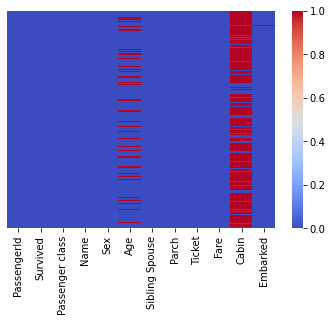

In [17]:
sns.heatmap(titanic.isnull(), yticklabels = False, cmap = 'coolwarm')

#cmap is color map. We can choose color for our distribution, we can use 'viridis'instead of 'coolwarm'
# yticklabels are y-axis tick labels which is set to False coz lots of numbers are there.

<AxesSubplot:xlabel='Passenger class', ylabel='Age'>

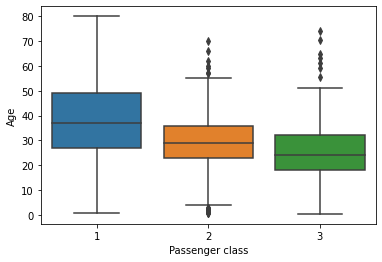

In [18]:
sns.boxplot(x='Passenger class',y='Age', data = titanic)

#this shows older people preferred 1st class

In [19]:
titanic.dropna(inplace = True)

<AxesSubplot:>

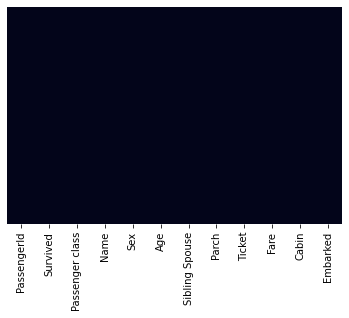

In [20]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar= False)

In [21]:
sex = pd.get_dummies(titanic['Sex'])
sex.head()

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0


In [22]:
sex = pd.get_dummies(titanic['Sex'], drop_first = True)
sex.head()

,male
1,0
3,0
6,1
10,0
11,0


In [23]:
embarked = pd.get_dummies(titanic['Embarked'])
embarked.head()

,C,Q,S
1,1,0,0
3,0,0,1
6,0,0,1
10,0,0,1
11,0,0,1


In [24]:
embarked = pd.get_dummies(titanic['Embarked'], drop_first = True)
embarked.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [25]:
passengerclass = pd.get_dummies(titanic['Passenger class'])
passengerclass.head()

,1,2,3
1,1,0,0
3,1,0,0
6,1,0,0
10,0,0,1
11,1,0,0


In [26]:
passengerclass = pd.get_dummies(titanic['Passenger class'], drop_first=True)
passengerclass.head()

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [27]:
titanic = pd.concat([titanic, sex, embarked, passengerclass], axis = 1)
titanic.head()

,PassengerId,Survived,Passenger class,Name,Sex,Age,Sibling Spouse,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1,0,0


In [28]:
titanic.drop(['PassengerId','Passenger class','Name','Sex','Ticket','Cabin','Embarked', 'Fare'], axis=1, inplace=True)
titanic.head()

,Survived,Age,Sibling Spouse,Parch,male,Q,S,2,3
1,1,38.0,1,0,0,0,0,0,0
3,1,35.0,1,0,0,0,1,0,0
6,0,54.0,0,0,1,0,1,0,0
10,1,4.0,1,1,0,0,1,0,1
11,1,58.0,0,0,0,0,1,0,0


### Split the Data for Training and Testing for Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
y = titanic['Survived']                #this is our dependent variable i.e. Survived
x = titanic.drop('Survived', axis=1)   #rest of all are independent variable

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30)

### Fit the model : Logistic Regression

In [32]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
model.score(x_train, y_train)

0.7890625

In [34]:
model.score(x_test, y_test)

0.7636363636363637

In [35]:
#another way to test score is:

predictions = model.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7636363636363637

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.82      0.85      0.84        39

    accuracy                           0.76        55
   macro avg       0.71      0.70      0.71        55
weighted avg       0.76      0.76      0.76        55



### Modeling using DecisionTree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [99]:
dTree = DecisionTreeClassifier(criterion='entropy',max_depth=10, random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

In [100]:
dTree.score(x_train,y_train)

0.9765625

In [101]:
dTree.score(x_test, y_test)

0.8545454545454545